In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.math import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
from pandarallel import pandarallel
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import optuna
import sklearn
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
import pickle

In [2]:
pandarallel.initialize(progress_bar=True, nb_workers=4)

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


# <span style="color:purple"> LEITURA DATASET </span>

In [4]:
columns = [i for i in range(0, 63)]
columns.extend(["classe", "signer"])
dataset = pd.read_csv('dataset_v1.csv')
dataset.columns = columns
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,classe,signer
0,-0.017099,0.074121,0.029225,0.014051,0.058728,0.009632,0.039656,0.031753,0.009053,0.050213,...,-0.002303,-0.023718,-0.027572,0.010728,-0.039088,-0.027355,0.030383,-0.033267,a,1
1,-0.018522,0.077600,0.042304,0.014973,0.061625,0.021581,0.038191,0.035574,0.016315,0.050110,...,-0.003511,-0.024794,-0.028738,0.008505,-0.039760,-0.029456,0.025255,-0.032276,a,1
2,-0.017549,0.076456,0.024980,0.014994,0.061221,0.009028,0.040677,0.035193,0.006823,0.051242,...,-0.005212,-0.026816,-0.029069,0.009509,-0.043568,-0.029739,0.025860,-0.033943,a,1
3,-0.018035,0.074108,0.026305,0.014335,0.061480,0.009067,0.041155,0.034971,0.007484,0.053065,...,-0.005967,-0.025329,-0.028049,0.008154,-0.042830,-0.029469,0.025276,-0.035842,a,1
4,-0.019758,0.073813,0.022515,0.013214,0.060358,0.003533,0.040344,0.034076,0.003901,0.050639,...,-0.006707,-0.024691,-0.028827,0.006417,-0.041393,-0.029537,0.025182,-0.036341,a,1


In [5]:
len(dataset.index)

12580

In [34]:
signers_train = [3, 4, 5, 6, 7, 8]
signers_test = [1, 2]

In [8]:
classes = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'i', 'l', 'm', 'n', 'o', 'p',
        'q', 'r', 's', 't', 'u', 'v', 'w', 'y']

In [9]:
le = preprocessing.LabelEncoder()
le.fit(classes)

LabelEncoder()

In [35]:
dataset_train = dataset.loc[dataset['signer'].isin(signers_train)]

In [36]:
feats = [i for i in range(0, 63)]

X_train = np.array(dataset_train[feats])
Y_train = np.array(le.transform(dataset_train['classe']))

X_train = preprocessing.normalize(X_train)

In [37]:
dataset_test = dataset.loc[dataset['signer'].isin(signers_test)]

In [38]:
X_test = np.array(dataset_test[feats])
Y_test = np.array(le.transform(dataset_test['classe']))

X_test = preprocessing.normalize(X_test)

# <span style="color:purple"> ANÁLISE DO DATASET</span>

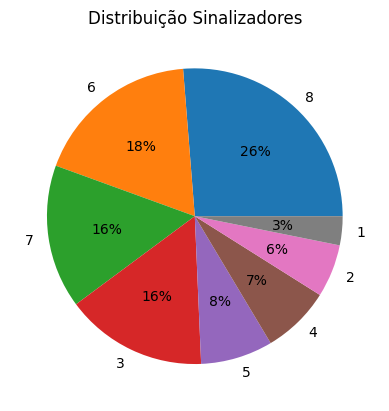

In [6]:
signer_data = dataset['signer'].value_counts()
plt.title('Distribuição Sinalizadores')
_ = plt.pie(signer_data, labels=signer_data.index, autopct='%.0f%%')

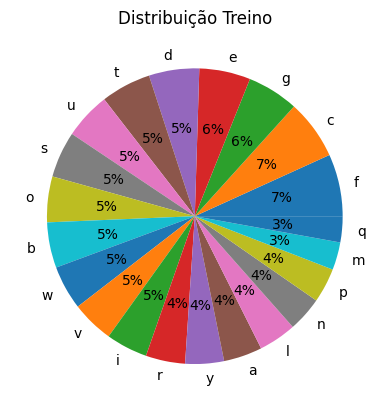

In [39]:
data = dataset_train['classe'].value_counts()
plt.title('Distribuição Treino')
_ = plt.pie(data, labels=data.index, autopct='%.0f%%')

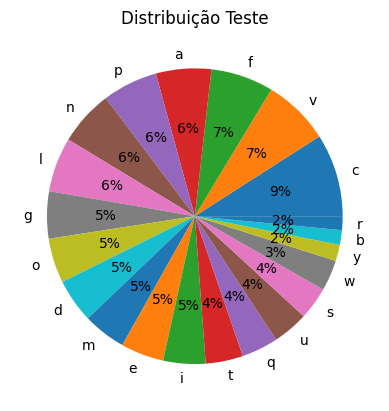

In [40]:
data = dataset_test['classe'].value_counts()
plt.title('Distribuição Teste')
_ = plt.pie(data, labels=data.index, autopct='%.0f%%')

In [41]:
X_train.shape, X_test.shape

((11455, 63), (1125, 63))

# <span style="color:purple"> SVM </span>

In [42]:
model = svm.SVC(decision_function_shape='ovr')

In [43]:
model.fit(X_train, Y_train)

SVC()

In [44]:
pred = model.predict(X_test)

In [45]:
print(classification_report(Y_test, pred, target_names=classes))

              precision    recall  f1-score   support

           a       1.00      0.99      0.99        68
           b       1.00      1.00      1.00        18
           c       0.99      1.00      1.00       102
           d       0.98      0.98      0.98        54
           e       1.00      1.00      1.00        53
           f       0.63      1.00      0.77        77
           g       1.00      1.00      1.00        58
           i       1.00      0.42      0.59        52
           l       1.00      1.00      1.00        67
           m       0.94      0.96      0.95        53
           n       0.95      0.90      0.92        68
           o       1.00      0.91      0.95        55
           p       0.97      1.00      0.99        68
           q       0.86      0.96      0.91        45
           r       0.26      0.94      0.41        17
           s       0.98      1.00      0.99        40
           t       1.00      0.02      0.04        46
           u       0.00    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

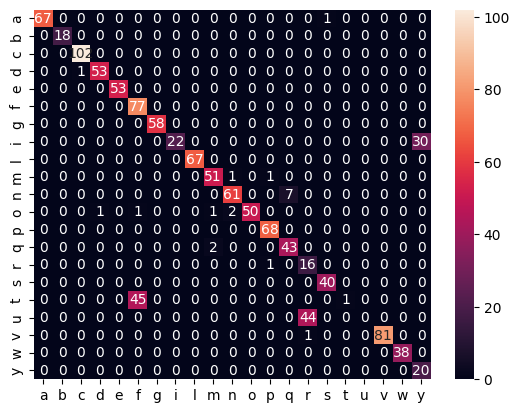

In [46]:
cm = confusion_matrix(Y_test, pred)

df_cm = pd.DataFrame(np.array(cm), index = classes, columns = classes)
sns.heatmap(df_cm, annot=True, fmt=".0f")

# <span style="color:purple"> OPTUNA </span>

In [47]:
def objective(trial):
    
    gamma = trial.suggest_float('gamma', 0.0001, 10)
    c = trial.suggest_float('c', 0.1, 100)
    
    clf = svm.SVC(decision_function_shape='ovr', C=c, gamma=gamma)
    
    return sklearn.model_selection.cross_val_score(
        clf, X_train, Y_train, n_jobs=-1, cv=3).mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2023-03-12 22:24:00,407] A new study created in memory with name: no-name-d347cabc-d0f7-4321-8a08-fa4f48068994
[I 2023-03-12 22:24:01,401] Trial 0 finished with value: 0.8978652179445379 and parameters: {'gamma': 0.3632239882073971, 'c': 12.53586088535432}. Best is trial 0 with value: 0.8978652179445379.
[I 2023-03-12 22:24:03,439] Trial 1 finished with value: 0.9064196492471703 and parameters: {'gamma': 9.64528045792001, 'c': 6.019171984884435}. Best is trial 1 with value: 0.9064196492471703.
[I 2023-03-12 22:24:05,312] Trial 2 finished with value: 0.9081658327242049 and parameters: {'gamma': 7.612914668417682, 'c': 66.070155954489}. Best is trial 2 with value: 0.9081658327242049.
[I 2023-03-12 22:24:06,894] Trial 3 finished with value: 0.9049373490409605 and parameters: {'gamma': 3.900575358749873, 'c': 63.58634707008885}. Best is trial 2 with value: 0.9081658327242049.
[I 2023-03-12 22:24:08,345] Trial 4 finished with value: 0.9039771458753031 and parameters: {'gamma': 2.11054163

Accuracy: 0.9112216480937926
Best hyperparameters: {'gamma': 4.576862259319289, 'c': 9.903088319538465}


In [48]:
final_model = svm.SVC(decision_function_shape='ovr', gamma=trial.params['gamma'], C=trial.params['c'], probability=True)

In [49]:
final_model.fit(X_train, Y_train)

SVC(C=9.903088319538465, gamma=4.576862259319289, probability=True)

In [50]:
pred = model.predict(X_test)

In [51]:
print(classification_report(Y_test, pred, target_names=classes))

              precision    recall  f1-score   support

           a       1.00      0.99      0.99        68
           b       1.00      1.00      1.00        18
           c       0.99      1.00      1.00       102
           d       0.98      0.98      0.98        54
           e       1.00      1.00      1.00        53
           f       0.63      1.00      0.77        77
           g       1.00      1.00      1.00        58
           i       1.00      0.42      0.59        52
           l       1.00      1.00      1.00        67
           m       0.94      0.96      0.95        53
           n       0.95      0.90      0.92        68
           o       1.00      0.91      0.95        55
           p       0.97      1.00      0.99        68
           q       0.86      0.96      0.91        45
           r       0.26      0.94      0.41        17
           s       0.98      1.00      0.99        40
           t       1.00      0.02      0.04        46
           u       0.00    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# <span style="color:purple"> CONVERT TO ONNX </span>

In [17]:
initial_type = [ 
    ( 'input_landmarks' , FloatTensorType( [None,63] ) ) 
]

converted_model = convert_sklearn(final_model, initial_types=initial_type)

with open( "alphabet_model.onnx", "wb" ) as f:
        f.write( converted_model.SerializeToString() )